In [344]:
import pandas as pd

weather = pd.read_csv("weather.csv", index_col="DATE")


In [345]:
weather

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT08,WT10,WT11,WT13,WT14,WT16,WT18,WT21,WV01,WV03
DATE,,,,,,,,,,,,,,,,,,,,,
1998-07-04,USW00023293,"SAN JOSE, CA US",8.50,1740.0,1739.0,0.00,NaN,NaN,68.0,79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-07-05,USW00023293,"SAN JOSE, CA US",7.16,1606.0,1642.0,0.00,NaN,NaN,66.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-07-06,USW00023293,"SAN JOSE, CA US",6.26,1827.0,1554.0,0.00,NaN,NaN,70.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-07-07,USW00023293,"SAN JOSE, CA US",6.93,1418.0,1640.0,0.00,NaN,NaN,74.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-07-08,USW00023293,"SAN JOSE, CA US",7.83,1833.0,1801.0,0.00,NaN,NaN,66.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,USW00023293,"SAN JOSE, CA US",4.47,NaN,NaN,0.08,NaN,NaN,NaN,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,USW00023293,"SAN JOSE, CA US",5.82,NaN,NaN,0.00,NaN,NaN,NaN,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-02,USW00023293,"SAN JOSE, CA US",4.47,NaN,NaN,0.00,NaN,NaN,NaN,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [346]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [347]:
null_pct

STATION    0.000000
NAME       0.000000
AWND       0.000434
FMTM       0.469472
PGTM       0.482594
PRCP       0.000000
SNOW       0.986552
SNWD       0.989914
TAVG       0.720204
TMAX       0.003687
TMIN       0.003904
TSUN       0.870188
WDF2       0.000434
WDF5       0.006290
WSF2       0.000325
WSF5       0.006182
WT01       0.803384
WT02       0.985360
WT03       0.992734
WT04       0.999566
WT05       0.980805
WT07       0.985251
WT08       0.859885
WT10       0.999892
WT11       0.999783
WT13       0.897191
WT14       0.998590
WT16       0.895239
WT18       0.999892
WT21       0.995011
WV01       0.996638
WV03       0.999892
dtype: float64

In [348]:
valid_columns = weather.columns[null_pct < .05]

In [349]:
valid_columns

Index(['STATION', 'NAME', 'AWND', 'PRCP', 'TMAX', 'TMIN', 'WDF2', 'WDF5',
       'WSF2', 'WSF5'],
      dtype='object')

In [350]:
weather = weather[valid_columns].copy()

In [351]:
weather.columns = weather.columns.str.lower()   

In [352]:
weather

,station,name,awnd,prcp,tmax,tmin,wdf2,wdf5,wsf2,wsf5
DATE,,,,,,,,,,
1998-07-04,USW00023293,"SAN JOSE, CA US",8.50,0.00,79.0,56.0,320.0,320.0,16.1,17.9
1998-07-05,USW00023293,"SAN JOSE, CA US",7.16,0.00,78.0,53.0,320.0,310.0,16.1,17.9
1998-07-06,USW00023293,"SAN JOSE, CA US",6.26,0.00,84.0,55.0,310.0,310.0,13.0,15.0
1998-07-07,USW00023293,"SAN JOSE, CA US",6.93,0.00,88.0,59.0,320.0,310.0,16.1,17.9
1998-07-08,USW00023293,"SAN JOSE, CA US",7.83,0.00,75.0,57.0,320.0,320.0,16.1,17.9
...,...,...,...,...,...,...,...,...,...,...
2023-09-30,USW00023293,"SAN JOSE, CA US",4.47,0.08,69.0,59.0,300.0,310.0,14.1,17.0
2023-10-01,USW00023293,"SAN JOSE, CA US",5.82,0.00,78.0,57.0,330.0,350.0,17.0,28.0
2023-10-02,USW00023293,"SAN JOSE, CA US",4.47,0.00,82.0,54.0,330.0,330.0,16.1,19.0


In [353]:
weather = weather.ffill()

In [354]:
weather.apply(pd.isnull).sum()

station    0
name       0
awnd       0
prcp       0
tmax       0
tmin       0
wdf2       0
wdf5       0
wsf2       0
wsf5       0
dtype: int64

In [355]:
weather.dtypes

station     object
name        object
awnd       float64
prcp       float64
tmax       float64
tmin       float64
wdf2       float64
wdf5       float64
wsf2       float64
wsf5       float64
dtype: object

In [356]:
weather.index

Index(['1998-07-04', '1998-07-05', '1998-07-06', '1998-07-07', '1998-07-08',
       '1998-07-09', '1998-07-10', '1998-07-11', '1998-07-12', '1998-07-13',
       ...
       '2023-09-25', '2023-09-26', '2023-09-27', '2023-09-28', '2023-09-29',
       '2023-09-30', '2023-10-01', '2023-10-02', '2023-10-03', '2023-10-04'],
      dtype='object', name='DATE', length=9221)

In [357]:
weather.index = pd.to_datetime(weather.index)

In [358]:
weather.index

DatetimeIndex(['1998-07-04', '1998-07-05', '1998-07-06', '1998-07-07',
               '1998-07-08', '1998-07-09', '1998-07-10', '1998-07-11',
               '1998-07-12', '1998-07-13',
               ...
               '2023-09-25', '2023-09-26', '2023-09-27', '2023-09-28',
               '2023-09-29', '2023-09-30', '2023-10-01', '2023-10-02',
               '2023-10-03', '2023-10-04'],
              dtype='datetime64[ns]', name='DATE', length=9221, freq=None)

In [359]:
weather.index.year

Index([1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
       ...
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
      dtype='int32', name='DATE', length=9221)

In [360]:
weather.index.year.value_counts().sort_index()

DATE
1998    181
1999    365
2000    364
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    364
2023    277
Name: count, dtype: int64

<Axes: xlabel='DATE'>

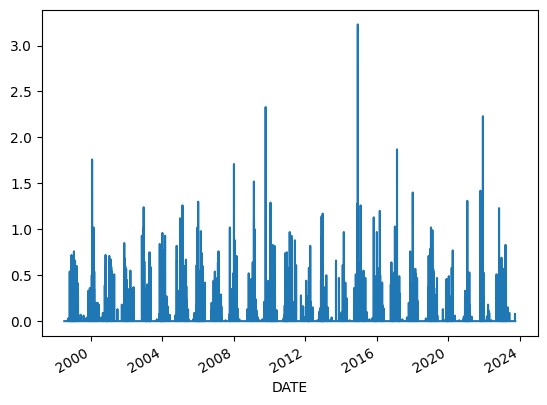

In [361]:
weather["prcp"].plot()

In [362]:
weather["target"] = weather.shift(-1)["tmax"]

In [363]:
weather

,station,name,awnd,prcp,tmax,tmin,wdf2,wdf5,wsf2,wsf5,target
DATE,,,,,,,,,,,
1998-07-04,USW00023293,"SAN JOSE, CA US",8.50,0.00,79.0,56.0,320.0,320.0,16.1,17.9,78.0
1998-07-05,USW00023293,"SAN JOSE, CA US",7.16,0.00,78.0,53.0,320.0,310.0,16.1,17.9,84.0
1998-07-06,USW00023293,"SAN JOSE, CA US",6.26,0.00,84.0,55.0,310.0,310.0,13.0,15.0,88.0
1998-07-07,USW00023293,"SAN JOSE, CA US",6.93,0.00,88.0,59.0,320.0,310.0,16.1,17.9,75.0
1998-07-08,USW00023293,"SAN JOSE, CA US",7.83,0.00,75.0,57.0,320.0,320.0,16.1,17.9,71.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,USW00023293,"SAN JOSE, CA US",4.47,0.08,69.0,59.0,300.0,310.0,14.1,17.0,78.0
2023-10-01,USW00023293,"SAN JOSE, CA US",5.82,0.00,78.0,57.0,330.0,350.0,17.0,28.0,82.0
2023-10-02,USW00023293,"SAN JOSE, CA US",4.47,0.00,82.0,54.0,330.0,330.0,16.1,19.0,83.0


In [364]:
weather = weather.ffill()

In [365]:
weather

,station,name,awnd,prcp,tmax,tmin,wdf2,wdf5,wsf2,wsf5,target
DATE,,,,,,,,,,,
1998-07-04,USW00023293,"SAN JOSE, CA US",8.50,0.00,79.0,56.0,320.0,320.0,16.1,17.9,78.0
1998-07-05,USW00023293,"SAN JOSE, CA US",7.16,0.00,78.0,53.0,320.0,310.0,16.1,17.9,84.0
1998-07-06,USW00023293,"SAN JOSE, CA US",6.26,0.00,84.0,55.0,310.0,310.0,13.0,15.0,88.0
1998-07-07,USW00023293,"SAN JOSE, CA US",6.93,0.00,88.0,59.0,320.0,310.0,16.1,17.9,75.0
1998-07-08,USW00023293,"SAN JOSE, CA US",7.83,0.00,75.0,57.0,320.0,320.0,16.1,17.9,71.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,USW00023293,"SAN JOSE, CA US",4.47,0.08,69.0,59.0,300.0,310.0,14.1,17.0,78.0
2023-10-01,USW00023293,"SAN JOSE, CA US",5.82,0.00,78.0,57.0,330.0,350.0,17.0,28.0,82.0
2023-10-02,USW00023293,"SAN JOSE, CA US",4.47,0.00,82.0,54.0,330.0,330.0,16.1,19.0,83.0


In [366]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [367]:
predictors = weather.columns[~weather.columns.isin(["target","name","station"])]

In [368]:
predictors

Index(['awnd', 'prcp', 'tmax', 'tmin', 'wdf2', 'wdf5', 'wsf2', 'wsf5'], dtype='object')

In [369]:
def backtest(weather, model, predictors, start=3650,step = 90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])

        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)

        combined.columns = ["actual", "prediction"]

        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)
    return pd.concat(all_predictions)    

In [370]:
predictions = backtest(weather, rr, predictors)

In [371]:
predictions

,actual,prediction,diff
DATE,,,
2008-07-03,77.0,80.142502,3.142502
2008-07-04,82.0,77.210047,4.789953
2008-07-05,84.0,80.677845,3.322155
2008-07-06,95.0,82.174687,12.825313
2008-07-07,101.0,90.781700,10.218300
...,...,...,...
2023-09-30,78.0,70.876155,7.123845
2023-10-01,82.0,77.989171,4.010829
2023-10-02,83.0,80.177011,2.822989


In [372]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"], predictions["prediction"])


3.8182196502534986

In [373]:
predictions["diff"].mean()

3.8182196502534986

In [374]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [375]:
weather

,station,name,awnd,prcp,tmax,tmin,wdf2,wdf5,wsf2,wsf5,...,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,,
1998-07-04,USW00023293,"SAN JOSE, CA US",8.50,0.00,79.0,56.0,320.0,320.0,16.1,17.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-07-05,USW00023293,"SAN JOSE, CA US",7.16,0.00,78.0,53.0,320.0,310.0,16.1,17.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-07-06,USW00023293,"SAN JOSE, CA US",6.26,0.00,84.0,55.0,310.0,310.0,13.0,15.0,...,54.666667,0.006098,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-07-07,USW00023293,"SAN JOSE, CA US",6.93,0.00,88.0,59.0,320.0,310.0,16.1,17.9,...,55.666667,0.059880,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-07-08,USW00023293,"SAN JOSE, CA US",7.83,0.00,75.0,57.0,320.0,320.0,16.1,17.9,...,57.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,USW00023293,"SAN JOSE, CA US",4.47,0.08,69.0,59.0,300.0,310.0,14.1,17.0,...,56.333333,0.047337,0.026667,2.0,78.571429,-0.121818,57.357143,0.028643,0.005714,13.0
2023-10-01,USW00023293,"SAN JOSE, CA US",5.82,0.00,78.0,57.0,330.0,350.0,17.0,28.0,...,57.666667,-0.011561,0.026667,-1.0,78.571429,-0.007273,56.928571,0.001255,0.005714,-1.0
2023-10-02,USW00023293,"SAN JOSE, CA US",4.47,0.00,82.0,54.0,330.0,330.0,16.1,19.0,...,56.666667,-0.047059,0.026667,-1.0,78.785714,0.040798,56.642857,-0.046658,0.005714,-1.0


In [376]:
weather = weather.iloc[14:,:]

In [377]:
weather

,station,name,awnd,prcp,tmax,tmin,wdf2,wdf5,wsf2,wsf5,...,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,,
1998-07-18,USW00023293,"SAN JOSE, CA US",5.82,0.00,93.0,60.0,310.0,310.0,14.1,16.1,...,59.333333,0.011236,0.000000,NaN,81.571429,0.140105,57.214286,0.048689,0.000000,NaN
1998-07-19,USW00023293,"SAN JOSE, CA US",6.71,0.00,91.0,61.0,320.0,320.0,14.1,16.1,...,59.666667,0.022346,0.000000,NaN,82.500000,0.103030,57.785714,0.055624,0.000000,NaN
1998-07-20,USW00023293,"SAN JOSE, CA US",7.38,0.00,79.0,59.0,330.0,320.0,17.0,19.9,...,60.000000,-0.016667,0.000000,NaN,82.142857,-0.038261,58.071429,0.015990,0.000000,NaN
1998-07-21,USW00023293,"SAN JOSE, CA US",7.61,0.00,74.0,59.0,330.0,340.0,16.1,17.9,...,59.666667,-0.011173,0.000000,NaN,81.142857,-0.088028,58.071429,0.015990,0.000000,NaN
1998-07-22,USW00023293,"SAN JOSE, CA US",6.93,0.00,74.0,58.0,330.0,330.0,16.1,19.9,...,58.666667,-0.011364,0.000000,NaN,81.071429,-0.087225,58.142857,-0.002457,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,USW00023293,"SAN JOSE, CA US",4.47,0.08,69.0,59.0,300.0,310.0,14.1,17.0,...,56.333333,0.047337,0.026667,2.0,78.571429,-0.121818,57.357143,0.028643,0.005714,13.0
2023-10-01,USW00023293,"SAN JOSE, CA US",5.82,0.00,78.0,57.0,330.0,350.0,17.0,28.0,...,57.666667,-0.011561,0.026667,-1.0,78.571429,-0.007273,56.928571,0.001255,0.005714,-1.0
2023-10-02,USW00023293,"SAN JOSE, CA US",4.47,0.00,82.0,54.0,330.0,330.0,16.1,19.0,...,56.666667,-0.047059,0.026667,-1.0,78.785714,0.040798,56.642857,-0.046658,0.005714,-1.0


In [378]:
weather = weather.fillna(0)

In [379]:
weather

,station,name,awnd,prcp,tmax,tmin,wdf2,wdf5,wsf2,wsf5,...,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,,
1998-07-18,USW00023293,"SAN JOSE, CA US",5.82,0.00,93.0,60.0,310.0,310.0,14.1,16.1,...,59.333333,0.011236,0.000000,0.0,81.571429,0.140105,57.214286,0.048689,0.000000,0.0
1998-07-19,USW00023293,"SAN JOSE, CA US",6.71,0.00,91.0,61.0,320.0,320.0,14.1,16.1,...,59.666667,0.022346,0.000000,0.0,82.500000,0.103030,57.785714,0.055624,0.000000,0.0
1998-07-20,USW00023293,"SAN JOSE, CA US",7.38,0.00,79.0,59.0,330.0,320.0,17.0,19.9,...,60.000000,-0.016667,0.000000,0.0,82.142857,-0.038261,58.071429,0.015990,0.000000,0.0
1998-07-21,USW00023293,"SAN JOSE, CA US",7.61,0.00,74.0,59.0,330.0,340.0,16.1,17.9,...,59.666667,-0.011173,0.000000,0.0,81.142857,-0.088028,58.071429,0.015990,0.000000,0.0
1998-07-22,USW00023293,"SAN JOSE, CA US",6.93,0.00,74.0,58.0,330.0,330.0,16.1,19.9,...,58.666667,-0.011364,0.000000,0.0,81.071429,-0.087225,58.142857,-0.002457,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,USW00023293,"SAN JOSE, CA US",4.47,0.08,69.0,59.0,300.0,310.0,14.1,17.0,...,56.333333,0.047337,0.026667,2.0,78.571429,-0.121818,57.357143,0.028643,0.005714,13.0
2023-10-01,USW00023293,"SAN JOSE, CA US",5.82,0.00,78.0,57.0,330.0,350.0,17.0,28.0,...,57.666667,-0.011561,0.026667,-1.0,78.571429,-0.007273,56.928571,0.001255,0.005714,-1.0
2023-10-02,USW00023293,"SAN JOSE, CA US",4.47,0.00,82.0,54.0,330.0,330.0,16.1,19.0,...,56.666667,-0.047059,0.026667,-1.0,78.785714,0.040798,56.642857,-0.046658,0.005714,-1.0


In [380]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [381]:
weather

,station,name,awnd,prcp,tmax,tmin,wdf2,wdf5,wsf2,wsf5,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1998-07-18,USW00023293,"SAN JOSE, CA US",5.82,0.00,93.0,60.0,310.0,310.0,14.1,16.1,...,57.214286,0.048689,0.000000,0.0,93.000000,93.000000,60.000000,60.000000,0.000000,0.000000
1998-07-19,USW00023293,"SAN JOSE, CA US",6.71,0.00,91.0,61.0,320.0,320.0,14.1,16.1,...,57.785714,0.055624,0.000000,0.0,92.000000,91.000000,60.500000,61.000000,0.000000,0.000000
1998-07-20,USW00023293,"SAN JOSE, CA US",7.38,0.00,79.0,59.0,330.0,320.0,17.0,19.9,...,58.071429,0.015990,0.000000,0.0,87.666667,79.000000,60.000000,59.000000,0.000000,0.000000
1998-07-21,USW00023293,"SAN JOSE, CA US",7.61,0.00,74.0,59.0,330.0,340.0,16.1,17.9,...,58.071429,0.015990,0.000000,0.0,84.250000,74.000000,59.750000,59.000000,0.000000,0.000000
1998-07-22,USW00023293,"SAN JOSE, CA US",6.93,0.00,74.0,58.0,330.0,330.0,16.1,19.9,...,58.142857,-0.002457,0.000000,0.0,82.200000,74.000000,59.400000,58.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,USW00023293,"SAN JOSE, CA US",4.47,0.08,69.0,59.0,300.0,310.0,14.1,17.0,...,57.357143,0.028643,0.005714,13.0,80.912821,78.076923,57.616667,56.076923,0.003192,0.003462
2023-10-01,USW00023293,"SAN JOSE, CA US",5.82,0.00,78.0,57.0,330.0,350.0,17.0,28.0,...,56.928571,0.001255,0.005714,-1.0,75.389175,77.692308,52.974227,55.961538,0.019407,0.005385
2023-10-02,USW00023293,"SAN JOSE, CA US",4.47,0.00,82.0,54.0,330.0,330.0,16.1,19.0,...,56.642857,-0.046658,0.005714,-1.0,75.397683,79.230769,52.975547,55.615385,0.019382,0.000000


In [382]:
predictors = weather.columns[~weather.columns.isin(["target","name","station"])]

In [383]:
predictors

Index(['awnd', 'prcp', 'tmax', 'tmin', 'wdf2', 'wdf5', 'wsf2', 'wsf5',
       'rolling_3_tmax', 'rolling_3_tmax_pct', 'rolling_3_tmin',
       'rolling_3_tmin_pct', 'rolling_3_prcp', 'rolling_3_prcp_pct',
       'rolling_14_tmax', 'rolling_14_tmax_pct', 'rolling_14_tmin',
       'rolling_14_tmin_pct', 'rolling_14_prcp', 'rolling_14_prcp_pct',
       'month_avg_tmax', 'day_avg_tmax', 'month_avg_tmin', 'day_avg_tmin',
       'month_avg_prcp', 'day_avg_prcp'],
      dtype='object')

In [384]:
predictions = backtest(weather,rr, predictors)

In [385]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

3.679887719166337

In [386]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2012-06-20,67.0,89.528387,22.528387
2018-09-01,98.0,79.246162,18.753838
2017-06-17,103.0,85.107949,17.892051
2009-08-29,75.0,92.870210,17.870210
2009-09-27,71.0,88.364005,17.364005
...,...,...,...
2010-08-07,78.0,77.995152,0.004848
2017-10-01,79.0,78.995217,0.004783
2022-01-24,63.0,62.996371,0.003629


<Axes: xlabel='diff'>

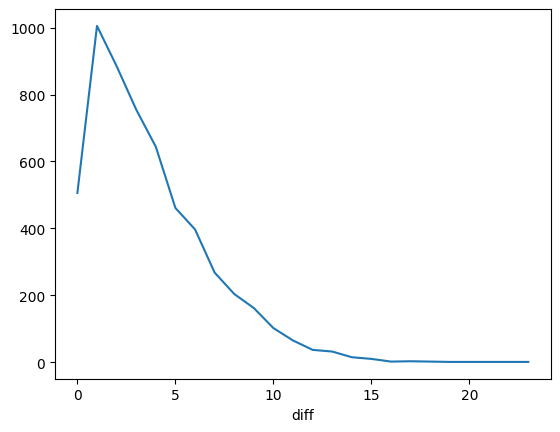

In [389]:
predictions["diff"].round().value_counts().sort_index().plot()